# Adjacency Matrices and the Page-Rank algorithm

This lab explores the Google Page-Rank Algorithm and it's relation to adjacency matrices. 

## 1. Graphs and Matrices

Below we see a graph, we came across these in FPM, and now they return! This time, we assign directions to our edges, and so this becomes a $\textit{directed}$ graph. We say that the edge $\textit{enters}$ Node A and $\textit{leaves}$ Node B. For simplicity, all graphs in this notebook will have no reflexive edges, that is edges which enter and leave the same node, and no duplicate edges, that is two edges entering and leaving the same nodes.

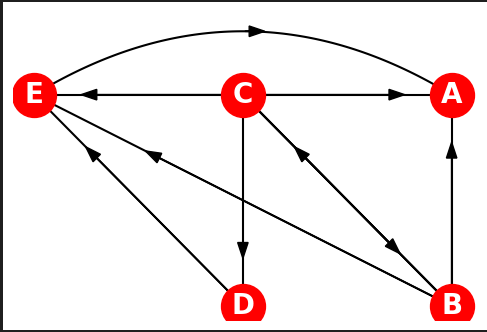

We can write the graph above as a list of tuples representing its edges with the first element being the node the edge is leaving and the second being the one it's entering. For example the edge from $B$ to $A$ in the graph above would be written $(B, A)$. This list of tuples and the list of nodes in a graph are enough to encode all the information of an unweighted graph.

[($B$,$A$), ($B$,$C$), ($B$,$E$), ($C$,$A$), ($C$,$B$), ($C$,$D$), ($C$,$E$), ($D$,$E$), ($E$,$A$)]

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd">Exercise 1.1</h3><span style="color:#fafbfc;background-color: #c93f3a; border-radius: 3pt">(assessed 1pts)</span>
    
Write a function that takes a list of directed edges represented by pairs $(a, b)$ and a node $\mathbf{N}$ and counts the number of nodes with an edge entering $\mathbf{N}$ and the number with an edge leaving $\mathbf{N}$. Return this as a tuple.

</div>

In [5]:
def count_in_out_edges(edges, N):
    '''This function should take a list "edges" of pairs (a,b) of nodes indicating a directed edge from node a to node b, a specific node N 
    and return a tuple of the number of edges going into and out of N'''
    #your code goes here
    raise NotImplementedError

In [3]:
#small example cases for debugging
g1 = generate_d_graph(3)
g2 = generate_d_graph(2)
assert(count_in_out_edges(g1, 'b') == in_out_sol(g1, 'b'))
assert(count_in_out_edges(g2, 'a') == in_out_sol(g2, 'a'))
#bigger test cases
h1 = generate_d_graph(15)
h2 = generate_d_graph(20)
assert(count_in_out_edges(h1, 'e') == in_out_sol(h1, 'e'))
assert(count_in_out_edges(h2, 'h') == in_out_sol(h2, 'h'))
print("Success! Your function works for the given input.")

NameError: name 'count_in_out_edges' is not defined

We can alternatively display the relationships between nodes using a matrix $M$, so when an edge leaves node A and enters node B, we have a 1 in the position $M_{BA}$, NOT in $M_{AB}$. The matrix will be a square $n \times n$ matrix where $n$ is the number of nodes in the graph. When two nodes C and D are not connected, we have a 0 in $M_{CD}$ and $M_{DC}$. This is the adjacency matrix of a directed graph. We can directly construct the adjacency matrix from the list of tuples we used previously.

\begin{align*}
&\;A\;\;\;B\;\;\;C\;\;\;D\;\;\;E\\ \mathbf{M}=
\begin{matrix}
    A \\
    B \\
    C \\
    D \\
    E 
\end{matrix} &\begin{bmatrix}
    0 & 1 & 1 & 0 & 1\\
    0 & 0 & 1 & 0 & 0\\
    0 & 1 & 0 & 0 & 0\\
    0 & 0 & 1 & 0 & 0\\
    0 & 1 & 1 & 1 & 0
\end{bmatrix}
\end{align*}

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 1.2</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 2pts)</span>
    
Write a function that takes a list of directed edges represented by pairs (a, b) and a list of the nodes in the graph and returns the adjacency matrix associated with that graph. (*Hint: You will most likely need to convert from symbols representing the nodes to integers*).

</div>

In [ ]:
def adjacency_Matrix(edges, nodes):
    '''This function should take a list "edges" of pairs (a,b) of nodes indicating a directed edge from node a to node b, the number of nodes n
     and return the adjacency matrix associated with the graph'''
    #your code goes here
    raise NotImplementedError

In [1]:
#simple cases with 5 or less vertices
g1 = generate_d_graph(3)
g2 = generate_d_graph(2)
assert(adjacency_Matrix(g1, ['A', 'B', 'C']) == (adjacency_sol(g1, ['A', 'B', 'C'])))
assert(adjacency_Matrix(g2, ['A', 'B']) == (adjacency_sol(g2, ['A', 'B'])))
#larger test cases
h1 = generate_d_graph(15)
h2 = generate_d_graph(20)
assert(adjacency_Matrix(h1, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']) == (adjacency_sol(h1,  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'])))
assert(adjacency_Matrix(h2, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']) == (adjacency_sol(h2,  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'])))
print("Success! Your function works for the given input.")

NameError: name 'generate_d_graph' is not defined

## 2. Adding Weighting

When we add weight to a graph we add a value to each edge. This can represent many things including imposing a 'cost' on traversing that edge in a road network or the likelihood of randomly choosing an edge when leaving a node. As our graphs are directed, we can only traverse edges in one direction, and this doesn't change when we add weights. The adjacency matrix of a weighted graph replaces every $1$ in the unweighted version with the weight of the corresponding edge. We will be exploring Google's Page Rank algorithm (Named after both Larry Page and web pages) which ranks the 'importance' of different webpages. From now on web pages will be our nodes and links between those webpages will be our edges. The weights will be what we use to calculate this importance.

A link from page $A$ to page $B$ can be thought of as a recommendation from page $A$ to page $B$. We want to value recommendations from pages which make very few recommendations so if $A$ makes $t$ total recommendations then we want every recommendation from $A$ to have a weight of $\frac{1}{t}$. This means the adjacency matrix will now be:
\begin{equation*} 
m_{i, j} =
\begin{cases}
0 & \text{no link from $j$ to $i$} \\
\frac{1}{t_j} & \text{otherwise}
\end{cases}
\end{equation*}
Where $t_{j}$ is the total number of links exiting $j$. We can also think of these recommendations probabilistically as a crude estimation of how likely we are to go from page $A$ to page $B$ by randomly selecting one of the links to follow. This will become key.

\begin{align*}
&\;A\;\;\;\;\;B\;\;\;\;\;C\;\;\;\;\;D\;\;\;\;\;E\\ \mathbf{M}=
\begin{matrix}
    A \\
    \\
    B \\
    \\
    C \\
    \\
    D \\
    \\
    E 
\end{matrix} &\begin{bmatrix}
    0 & 1/3 & 1/4 & 0 & 1\\
    0 & 0 & 1/4 & 0 & 0\\
    0 & 1/3 & 0 & 0 & 0\\
    0 & 0 & 1/4 & 0 & 0\\
    0 & 1/3 & 1/4 & 1 & 0
\end{bmatrix}
\end{align*}

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 2.1</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 2pts)</span>
    
Write a function that takes a list of directed edges represented by pairs $(a, b)$ and returns the weighted adjacency matrix as we've defined it for the importance of web connections. (*Hint: You might save time on a solution by making use of 1.1 and 1.2*).

</div>

In [ ]:
def weighting_calc_simple(edges, n):
    '''This function should take a list "edges" of pairs (a,b) of nodes indicating a directed edge from node a to node b, the number of nodes n
     and return a list of pairs (a,c) with c being the importance of the node'''
    #your code goes here
    raise NotImplementedError

In [8]:
g1 = generate_d_graph(3)
g2 = generate_d_graph(2)
assert(weighting_calc_simple(g1, ['A', 'B', 'C']) == (weighting_calc_simple_sol(g1, ['A', 'B', 'C'])))
assert(weighting_calc_simple(g2, ['A', 'B']) == (weighting_calc_simple_sol(g2, ['A', 'B'])))
#larger test cases
h1 = generate_d_graph(15)
h2 = generate_d_graph(20)
assert(weighting_calc_simple(h1, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']) == (weighting_calc_simple_sol(h1,  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'])))
assert(weighting_calc_simple(h2, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']) == (weighting_calc_simple_sol(h2,  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'])))
print("Success! Your function works for the given input.")

['A', 'B', 'C']


ValueError: Sample larger than population or is negative

We can immediately improve this weighting system. Note all recommendations are created equal. We want to prioritize recommendations (links) from important web pages. At first this seems difficult since we now need to calculate importance but we can get around with this with some linear algebra. If we take out simple weighting from before and call that adjacency matrix $M$. The importance of all the nodes can be written as a vector $\vec{v}$ with $v_i$ corresponding to the importance of node $i$. We want to multiply each entry in $M$ by these values in other words $Mv$ which will be the importance vector we're looking for. Written in linear algebra:
\begin{equation*}
\vec{v} = M\vec{v}.
\end{equation*}
This means our importance vector should be an eigenvector of the adjacency matrix with eigenvalue $1$. Ideally we want this to be unique up to scaling since this will give us a single well defined ordering, but addressing this will take a little more work. We also note that currently a node connected to no other nodes will produce a column of all zeroes. This will be a problem as we continue so for now we assume that an unconnected nodes is in fact connected to all nodes. This seems odd but will be changed later.

If you run the code cell below a few times which will calculate the eigenvectors of our weighted adjacency matrix for a random graph what do you notice?

In [ ]:
web = generate_d_graph(15)
show_graph(web)
M = weighting_calc_simple_sol_2(web, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'])
pretty_print(table(M.eigenvectors_right()))

NameError: name 'generate_d_graph' is not defined

You should see that $1$ always ends up being an eigenvalue, which is good news and will be discussed directly in the next section. Depending on the graph that gets generated, it may be the case that the dimension of $E(1, M)$ is not $1$, this will also be fixed in a later section. You should also notice that our eigenvector has a lot of $0$s which isn't ideal for ordering them.

## 3. Markov Matrices

Markov matrices play a crucial role in various fields, including probability theory and dynamic systems. In this section, we will examine the properties of Markov matrices and develop a function to validate whether a given matrix conforms to the Markov property. Understanding Markov matrices is essential for analysing processes with probabilistic transitions.

Recall that a Markov matrix has non-negative entries and that the sum of entries of each column equal to 1. This tells us something very important about Markov matrices' eigenvalues. Recall the proof of Lemma 4.7.6 from your notes: a Markov matrix always has $\lambda = 1$ as an eigenvalue. Do you think you can come up with a function that tests for this?

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 3.1</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 1pts)</span>
    
Write a function that takes an $n\times n$ matrix and returns whether or not that matrix is a valid Markov matrix.

</div>

In [ ]:
def validate_Markov(M):
    '''This function takes in a matrix M and returns whether or not it is a Markov Matrix'''
    #your code goes here
    raise NotImplementedError

In [ ]:
#small matrices for easy test cases
assert(validate_Markov(generate_markov(4)))
assert(not(validate_Markov(generate_markov(4) + 0.2*adjacency_sol(generate_d_graph(4), ['A', 'B', 'C', 'D']))))
#big bad test cases
assert(validate_Markov(generate_markov(25)))
assert(not(validate_Markov(generate_markov(25)  + 0.2*adjacency_sol(generate_d_graph(25), ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']))))
print("Success! Your function works for the given test input.")

We care about Markov matrices because our weighted adjacency matrix is a Markov matrix. Verifying this is simple since along each row there are $t$ entries which are $\frac{1}{t}$ so the sum along any row is:
\begin{equation*}\sum_{i=1}^{t}\frac{1}{t} = \frac{t}{t} = 1.\end{equation*}
This explains why our matrix has always had an eigenvalue of $1$. It is also why we went ahead and defined a node with no outgoing connections to be connected everywhere since otherwise some columns of our matrix would sum to $0$. This also somewhat intuitively represents arriving at a dead end webpage and jumping to another random page and continuing to explore the web from there. If you aren't entirely convinced you can run the code cell below after completing exercises $2.1$ and $3.1$ to help verify your solutions and the claimed property.

In [ ]:
for i in range(50):
        graph = generate_d_graph(20)
        assert(validate_Markov(weighting_calc_simple_sol_2(graph, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'])))
pretty_print("Worked for quite a few tests.")

## 4. Teleportation Matrices

If we again think about our graphs, with each node as a webpage, and each edge as a link between two webpages, we can encounter some issues while trying to traverse this graph. $\textit{Dangling nodes}$ occur when we have a node which only has edges entering it, and none leaving, so we cannot physically leave this node once we enter, these are alternatively known as $\textit{sink nodes}$. An easy example of a webpage like this is a PDF made of images. We may also end up with nodes with no incoming connections. Our eigenvector is in some sense the eventual result of a random infinite walk around the graph. If we have these types of nodes we will never end up in these nodes with no incoming connections since we can only ever reach these nodes from a random jump from a dangling node. This will lead to entries being zero and we clearly don't think these  webpages are completely unimportant so we need to deal with this. In the cell below you can see an example of such a graph and the resulting eigenvector with zeroes for entries.

(2, 1)


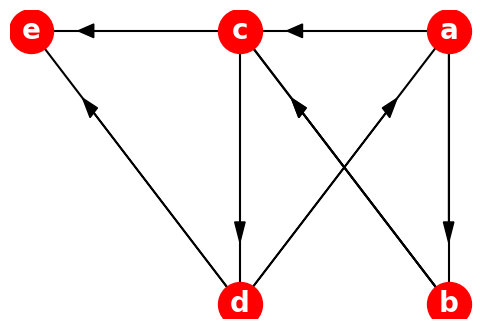

In [5]:
ex_graph_1 = [('a', 'c'), ('c', 'e'), ('a', 'b'), ('c', 'b'), ('b', 'd'), ('d', 'b'), ('d', 'f'), ('d', 'e'), ('e', 'f'), ('h', 'f'), ('f', 'h')]
show_graph(ex_graph_1)
ex_1_m = weighting_calc_simple_sol_2(ex_graph_1, ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
pretty_print(table(ex_1_m.eigenvectors_right()))

Disconnected components provide a different challenge, if we somehow have a completely independent section of the graph, where all nodes are connected only within this section and no edges leave the group we have disconnected components. These would be, in practice, pages which  only refer to themselves and are not referenced by any other pages (i.e., purely reflexive pages), or internet sections which only reference each other and reference no external pages. In this situation, our adjacency matrix will have a multi-dimensional eigenspace each with non-zero entries corresponding to one of the components so we can't properly compare these nodes. Again, an example of this can be seen by running the code cell below.

In [2]:
ex_graph_2 = [('a', 'b'), ('b', 'c'), ('c', 'a'), ('d', 'e'), ('e', 'f'), ('f', 'd')]
show_graph(ex_graph_2)
ex_2_m = weighting_calc_simple_sol_2(ex_graph_2, ['a', 'b', 'c', 'd', 'e', 'f'])
pretty_print(ex_2_m)
pretty_print(table(ex_2_m.eigenvectors_right()))

NameError: name 'show_graph' is not defined

In order to fix both of these these issues, we look to $\textit{teleportation matrices}$, which allow us to occasionally jump to a random node, regardless of it's connections. We calculate this matrix by:

$T = \frac{1}{N} \cdot J$,

 where $N$= number of pages, and $J$ is a matrix of all ones.


In order to construct a teleportation matrix, we must introduce a damping factor $d$, as seen above. This is usually between $0.85-0.95$. The teleportation matrix can be thought of as sometimes randomly deciding to jump to a new random webpage. This prevents us getting stuck and allows us to move between disconnected components.

We define our new "adjacency" matrix by the formula:
\begin{equation*} G = dM + (1-d)T\end{equation*}.
Crucially, this formula still produces a Markov matrix so we get to keep the nice properties we've developed so far. We can verify this pretty easily since the sum along any row of both matrices is $1$. We then multiply them by $d$ and $1-d$ and add them so the sum across both will be $d + (1-d) = 1$. We have only informally explained why the teleportation matrix fixes our issues, fortunately we have a rigorous mathematical justification as well in the form of the Perron-Frobenius Theorem.

**Perron-Frobenius Theorem** - If $M \in Mat(n;\mathbb{R})$  is a Markov matrix all of whose entries are positive, then the eigenspace $E(1,M)$ is one dimensional. There exists a unique basis vector $\vec{\text{v}} \in E(1,M)$ all of whose entries are positive real numbers, $v_i > 0$ $\forall i$, and such that the sum of it's entries is 1, $\sum_{i=1}^{n}v_i = 1$.

This theorem only applies now because we have no $0$ entries in $G$ they are instead all strictly positive. This follows from $M$ have all non-negative entries and all the entries in $T$ being $\frac{1}{N}>0$. Since we are now guaranteed a single eigenvector associated with the eigenvalue of $1$, which will have all positive values. We finally have our vector of 'importances' and we can rank our webpages according to the entries in the vector. This is the fundamental theory behind why PageRank works.

a dangling node

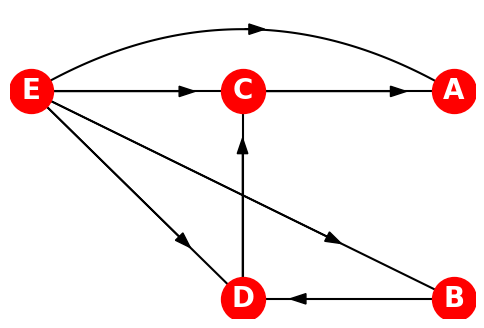

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 4.1</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 1pts)</span>
    
Write a function that returns the full Google matrix defined by G = dM + (1-d)M for some d between 0 and 1.

</div>

In [ ]:
def Google_matrix(M, d):
    '''This function takes in a matrix M which is the Markov adjacency matrix of a graph we have defined 
    and returns the Google Matrix using the damping factor d'''
    #your code goes here
    raise NotImplementedError

In [ ]:
assert()
assert()
assert()
assert()
print("Success! Your function works for the given test input.")

## 5. PageRank Algorithm

We now finally have all the pieces to construct the PageRank algorithm which we will now put together in a full step by step description. We will also address some practical concerns about how to calculate the ranks for significantly larger examples.

Before we fully set out PageRank, a reasonable question is how we plan on calculating the eigenvectors of our Markov matrix for extremely large matrices. There are over 30 billion web pages, so even just ranking a fraction of them could get very computationally intensive. This can be improved by using the formula:
\begin{equation*}
\lim_{k \rightarrow \infty}M^k\vec{w} = \vec{v}.
\end{equation*}

I want to add at least some discussion of convergence here!

The vector $\vec{w}$ is any initial starting guess where all of the entries of $\vec{w}$ are strictly positive and $\left| \vec{w} \right| = 1$. This shifts the calculation to repeated powers of the Markov matrix, which is what efficient algorithms exist for. The simplest is the power method, which works exactly as you would expect, repeatedly multiplying by the Markov matrix until we reach some tolerance that we've defined. More formal pseudocode would be:
```
  Function power_method(M, tolerance, w)
    v = Mw;
    while |v-w| > tolerance:
        w = v
        v = Mw / |Mw|
    return v
```
There are other methods for calculating the vector $\vec{v}$, including the inner-outer iteration method you can read about [here](https://www.sciencedirect.com/science/article/pii/S0377042714004294#:~:text=The%20PageRank%20algorithm%20makes%20use,link%20graph%20in%20the%20model.), which also presents a method introduced in 2015. [This](https://arxiv.org/pdf/2205.01598.pdf) paper which explores the topic of sparse matrix dense vector multiplication more generally.

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 5.1</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 1pts)</span>
    
Write a function that implements the power method algorithm for a matrix $M$, a given starting vector $\vec{w}$, and a tolerance $t$.

</div>

In [ ]:
def power_method(M, w, t):
    '''This function implements the power method for a matrix M a vector w and a tolerance t'''
    #your code goes here
    raise NotImplementedError

In [ ]:
assert()
assert()
assert()
assert()
print("Success! Your function works for the given test input.")

The power method at first does not seem very efficient or clever and in general it isn't. However, since web pages don't generally connect to almost all other webpages, most of the elements of the matrix $M$'s in out formula for the Google matrix $G = dM + (1-d)T$ are $0$, and $T$ is a simple constant so we can split the problem up and only deal with the matrix multiplication for $M$. 

This is convenient because the power method is known to be relatively fast for sparse matrices allowing us to do our computation in a reasonable amount of time. We can finally explicitly write the iterative formula for the PageRank of any particular page:
\begin{equation*}PR(P_i) = \frac{(1 - d)}{N} + d \times \left( \frac{PR(P_1)}{L(P_1)} + \frac{PR(P_2)}{L(P_2)} + \ldots + \frac{PR(P_n)}{L(P_n)} \right),\end{equation*}
where $PR(P_i)$ is the PageRank of page $P_i$, $L(P_i)$ is the number of links going out from page $P_i$, and $PR(P_j)$ is the PageRank of page $P_j$ linking to page $P_i$. 

This equation is actually slightly different than the initial publication from Larry Page and Sergey Brin, as they left off the division by $N$ in the first term by mistake. We can write this formula again in matrix notation as:
\begin{equation*} gotta write this at some point\end{equation*}
It is also worth mentioning that this ranking system is not unique to web pages, and applies to any network of relationships that you want to rank where the rank of one node depends on the ranks of others it's related to. For example German mathematician [Edmund Georg Hermann Landau](https://en.wikipedia.org/wiki/Edmund_Landau) proposed using it for chess tournament ranking in the late 1890s.

<div style="width: 95%; padding:10pt; color:#6c8dbd; background-color:#c5e0e6; border-radius: 6pt">
    <h3 style="color:#6c8dbd;">Exercise 5.2</h3><span style="color:#fafbfc; background-color: #c93f3a; border-radius: 3pt">(assessed 1pts)</span>
    
Given an adjacency matrix use your answers to the previous excercises to build an implementation of the PageRank algorithm which takes a matrix $M$ and a tolerance $t$ as input. You should make use of your answer to $5.1$ and not the built-in eigenvector function in Sage. A test case will be given that will make the eigenvector method impractical.

</div>

In [ ]:
def PageRank(M, t):
    '''This function implements the PageRank algorithm for a matrix M and a tolerance t'''
    #your code goes here
    raise NotImplementedError

In [ ]:
assert()
assert()
assert()
assert()
print("Success! Your function works for the given test input.")

We now return briefly to explaining the damping factor $d$ in a bit more detail because currently it is very arbitrary. This factor represents the probability that a web surfer will continue clicking on links rather than jumping to a random page. Common values for the damping factor are around 0.85. Values around $0.85$ are ideal because the factor $d$ ends up having a lot of impact, both on the accuracy of our method and the speed. The higher $d$ is, the more accurate our method will be. You can think of it as weighting the actual matrix of connections more heavily, rather than our teleportation matrix which isn't based on the underlying structure.

The obvious next question, is why don't we choose a larger $d$ to be even more accurate? It turns out that the bigger $d$ is, the slower our algorithm becomes. You can see this if you vary $d$ between $0$ and $1$, using the given function in the code cell below and the built-in timeit function. For these relatively small cases, the differences won't be too large, but you can imagine how it would scale up to 30 billion web pages.

In [ ]:
#Once I write the solution for 5.2 and the tests I can add this pretty easily

Construct the Web Graph: The first step is to construct a graph representing the web pages on the internet and the links between them. Each web page is represented as a node in the graph, and a directed edge between two nodes represents a link from one page to another. This is our adjacency matrix.

Initialise PageRank Values: Assign an initial PageRank value to each node in the graph. This value represents the importance or popularity of the web page. Initially, all pages may be assigned the same value, or some heuristic may be used to assign initial values.

Iterative Calculation of PageRank: PageRank is calculated iteratively based on the principle of "voting." In each iteration, the PageRank value of each page is updated based on the PageRank values of the pages linking to it. A page with many incoming links from high-quality pages will have a higher PageRank value.

Damping Factor: To prevent issues such as infinite loops and to model the behavior of web surfers who may randomly jump from page to page, a damping factor (we denote as $d$ ) is introduced. 

Calculate PageRank Equation: The PageRank of a page $P_i$ in the $k+1^{th}$ iteration is calculated using the formula:






Convergence: The iterative calculation continues until the PageRank values converge to stable values. Typically, a convergence criterion is used, such as a maximum number of iterations or a threshold for the change in PageRank values between iterations.

Ranking Pages: Once the PageRank values have converged, the pages are ranked based on their final PageRank values. Pages with higher PageRank values are considered more important or relevant and are ranked higher in search engine results.

In [1]:
from random import choices
from random import randint
def generate_d_graph(n):
    if n > 26:
        raise ValueError("n must be less than or equal to 26")
    graph = []
    nodes = [chr(65+i) for i in range(n)]
    for node in nodes:
        nodes_copy = nodes.copy()
        nodes_copy.remove(node)
        graph += [(node, i) for i in choices(nodes_copy, k=randint(0, 1))]
    connected_nodes = [i[0] for i in graph] + [i[1] for i in graph]
    unconnected_nodes = [i for i in nodes if i not in connected_nodes]
    
    for node in unconnected_nodes:
        nodes_copy = nodes.copy()
        nodes_copy.remove(node)
        graph += [(node, i) for i in choices(nodes_copy, k=randint(1,4))]
    
    return list(dict.fromkeys(graph))

In [ ]:
def markov_sol(M):
    for i in range(len(M.rows())):
        if(sum(column(M, i) != 0):
           return False
    return True

In [ ]:
def adjacency_sol(edges, nodes):
    number = dict(zip(nodes, range(len(nodes))))
    matrix_list = [[0 for i in range(len(nodes))] for j in range(len(nodes))]
    for edge in edges:
        matrix_list[number[edge[1]]][number[edge[0]]] = 1
    return matrix(matrix_list)

In [1]:
def in_out_sol(edges, g):
    return (sum([1 if edge[1] == g else 0 for edge in edges]), sum([1 if edge[0] == g else 0 for edge in edges]))

In [ ]:
from random import randint
def generate_markov(n):
    matrix_list = [[randint(1, 10) for i in range(n)] for j in range(n)]
    for i in range(n):
        t = sum(column(matrix_list, i))
        for j in range(n):
            matrix_list[j][i] = matrix_list[j][i]/t
    return matrix(QQ, matrix_list)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_graph(graph):
    nodes = sorted(set([i[0] for i in graph] + [i[1] for i in graph]))
    n = len(nodes)
    node_points = {node:(0-(i//int((n)**0.5)), 0-(i%int((n)**0.5))) for i,node in enumerate(nodes)}

    fig, ax = plt.subplots(figsize=((n//int((n)**0.5))+4,((n-1)%int((n)**0.5))+4))

    for node,xy in node_points.items():
        ax.scatter(xy[0], xy[1], s=1000, color="red", zorder=1)
        for connected_node in [i[1] for i in graph if node == i[0]]:
            c_node_xy = node_points[connected_node]
            d_x = (c_node_xy[0]-xy[0])
            d_y = (c_node_xy[1]-xy[1])
            sign = 1
            if d_x == 0 and abs(d_y)>1:
                if xy[0] == 0 or xy[0]==(n-1):
                    sign = -1
                y_vals = np.linspace(xy[1], c_node_xy[1], 100)
                x_func = lambda y : sign*(0.3)*(y-c_node_xy[1])*(y-xy[1]) + xy[0]
                ax.plot(x_func(y_vals), y_vals, zorder=0, color="black")
                ax.arrow(x_func(y_vals[50]), y_vals[50], 0.01*d_x, 0.01*d_y, zorder=0, color="black", head_width=0.05)
            elif d_y == 0 and abs(d_x)>1:
                if xy[1] == 0 or xy[1]==(n-1):
                    sign = -1
                x_vals = np.linspace(xy[0], c_node_xy[0], 100)
                y_func = lambda x : sign*(0.3)*(x-c_node_xy[0])*(x-xy[0]) + xy[1]
                ax.plot(x_vals, y_func(x_vals), zorder=0, color="black")
                ax.arrow(x_vals[50], y_func(x_vals[50]), 0.01*d_x, 0.01*d_y, zorder=0, color="black", head_width=0.05)
            else:
                ax.plot([xy[0], c_node_xy[0]], [xy[1], c_node_xy[1]], zorder=0, color="black")
                ax.arrow(xy[0], xy[1], d_x*0.7, d_y*0.7, zorder=0, color="black", head_width=0.05)
        ax.annotate(node, xy, ha='center', va='center', weight='bold', color="white", fontsize=20)

    ax.axis('off')

    plt.show()

show_graph(generate_d_graph(5))

(2, 1)


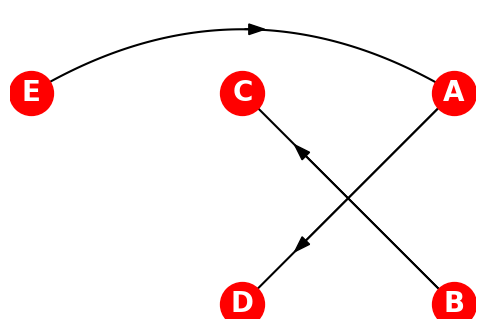

In [2]:
def weighting_calc_simple_sol(edges, nodes):
    number = dict(zip(nodes, range(len(nodes))))
    matrix_list = [[0 for i in range(len(nodes))] for j in range(len(nodes))]
    for edge in edges:
        t = count_in_out_edges(edges, edge[0])[1]
        matrix_list[number[edge[1]]][number[edge[0]]] = Rational(1/t)
    return matrix(matrix_list)

In [ ]:
def weighting_calc_simple_sol_2(edges, nodes):
    number = dict(zip(nodes, range(len(nodes))))
    matrix_list = [[0 for i in range(len(nodes))] for j in range(len(nodes))]
    for edge in edges:
        t = count_in_out_edges(edges, edge[0])[1]
        matrix_list[number[edge[1]]][number[edge[0]]] = Rational(1/t)
    for i in range(len(nodes)):
        if sum(column(matrix_list, i)) == 0:
            for j in range(len(nodes)):
                matrix_list[j][i] = 1/(len(nodes))
    return matrix(matrix_list)

def column(matrix, i):
    return [row[i] for row in matrix]